# CSE 144 Spring 2022 Assignment 1

In this assignment, the goal is to build a linear regression model to predict the song popularity based on energy, acoustics, instumentalness, liveness, dancibility, etc. We'll be using the [Song Popularity Dataset](https://www.kaggle.com/datasets/yasserh/song-popularity-dataset) dataset from Kaggle dataset.

In the first section, you'll perform standard data preprocessing using techniques we covered in class. In the second section, you'll train a simple linear regression model.

You should be able to use NumPy, Pandas, and the `train_test_split()` function from scikit-learn to complete everything in this assignment. We also imported Matplotlib for you to visualize the training and validation loss.

Remember that tuning on the test loss is prohibited.

## Rubric

The assignment is worth 57 points in total:
- Data preprocessing (12 points)
    - drop missing values (2 points)
    - drop outliers (5 points)
    - normalization (5 points)
- Dataset split (10 points)
    - test set split (5 points)
    - k-fold train and validation set split (5 points)
- Linear regression (25 points)
    - MSE_loss (3 points)
    - Gradient (5 points)
    - Specify the epoch number and learning rate (0 points)
    - Theta initialization (3 points)
    - Translate dataframe to numpy (3 points)
    - Traininig (5 points)
        - Save train and val loss (2 points)
        - Update parameters (3 points)
    - Find best parameters (3 points)
    - Evaluate on test set (3 points)
    
- Report (10 points, in a separate PDF file)
- Bonus (3 points)
    - If your test loss is below 0.025

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving song_data.csv to song_data (2).csv


In [ ]:
!python --version

Python 3.10.12


In [ ]:
from typing import List, Tuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm.notebook import trange

import random
seed = 144
random.seed(seed)
np.random.seed(seed)

<class 'pandas.core.frame.DataFrame'>
Index: 18835 entries, Boulevard of Broken Dreams to Up to Me
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_popularity   18835 non-null  int64  
 1   song_duration_ms  18835 non-null  int64  
 2   acousticness      18835 non-null  float64
 3   danceability      18835 non-null  float64
 4   energy            18835 non-null  float64
 5   instrumentalness  18835 non-null  float64
 6   key               18835 non-null  int64  
 7   liveness          18835 non-null  float64
 8   loudness          18835 non-null  float64
 9   audio_mode        18835 non-null  int64  
 10  speechiness       18835 non-null  float64
 11  tempo             18835 non-null  float64
 12  time_signature    18835 non-null  int64  
 13  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 2.2+ MB


array([[<Axes: title={'center': 'song_popularity'}>,
        <Axes: title={'center': 'song_duration_ms'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'danceability'}>],
       [<Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'liveness'}>],
       [<Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'audio_mode'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'tempo'}>],
       [<Axes: title={'center': 'time_signature'}>,
        <Axes: title={'center': 'audio_valence'}>, <Axes: >, <Axes: >]],
      dtype=object)

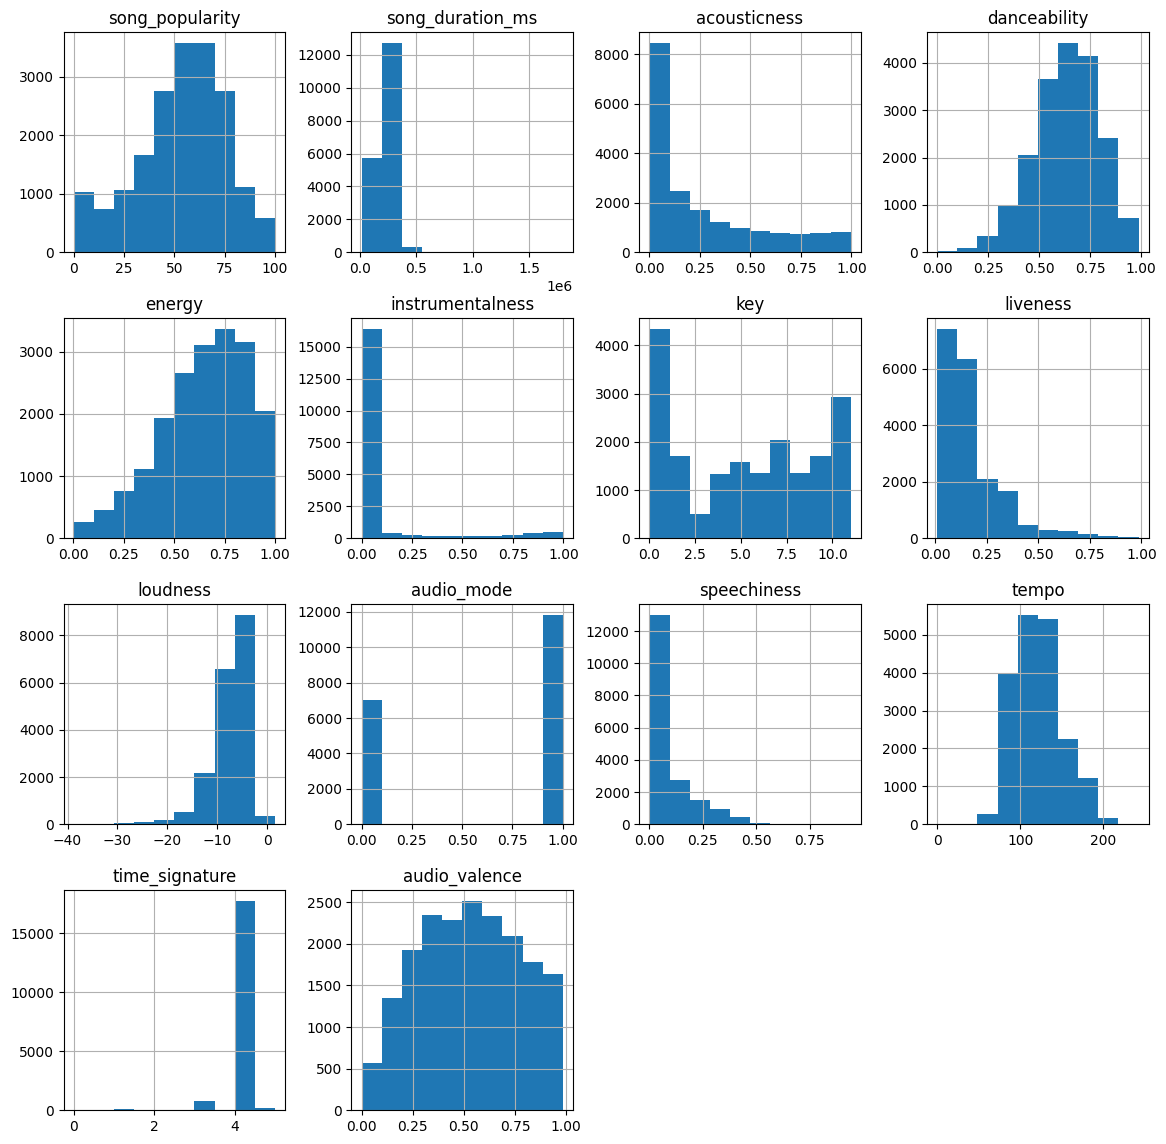

In [ ]:

# Load data
data = pd.read_csv("./song_data.csv", index_col=0)

# Visualize data
data.info()
data.hist(figsize=(14,14))
#print(len(data))

### Data Cleaning
`data.info()` shows that there are some missing values in the dataset. Also, we can see from the histogram that outliers exist for some features. Moreover, the range of different features has a huge gap: most in (0,1), but some are on the order of 1e2, or even 1e5. In the following you need to perform:
1. Drop rows that contain NULL values.
2. Remove outliers for features in ['song_duration_ms', 'instrumentalness'] based on interquantile range.
3. Scale ranges of independent variables using Z-score method, and normalize the range of dependent feature ['song_popularity'] from [0,100] to [0,1]

In [ ]:
# drop rows that have NULL value
# ========== YOUR CODE STARTS HERE ==========
pass
data = data.dropna();

# ========== YOUR CODE ENDS HERE ============

'''
Remove outliers for features in ['song_duration_ms', 'instrumentalness']
based on interquantile range. Here for each feature, we first sort data in an ascending order.
Let q1 and q3 be the data that ranks 25% and 75% respectively. We then let iqr = q3 - q1, and
compute
                a = q1 - iqr x 1.5,
                b = q3 + iqr x 1.5,
and remove the data out of the range [a, b].
Note: this can be realized with function quantile().
'''
for feature in ['song_duration_ms', 'instrumentalness']:
    # ========== YOUR CODE STARTS HERE ==========
    cols = feature
    #sort cols to be in ascending order
    data.sort_values(by = cols)
    q1 = data[cols].quantile(0.25)
    q3 = data[cols].quantile(0.75)
    iqr = q3-q1
    a = q1 - iqr*1.5
    b = q3+iqr*1.5
    #remove the data from the set from the range of [a,b]
    data = data[~((data[cols] < a) | (data[cols]> b))]
    #print(len(data))
    pass
    # ========== YOUR CODE ENDS HERE ============
data = data.reset_index(drop=True)
'''
Scale all independent features using z-score normalization, and normalize dependent feature range to [0, 1]
Note: use different mean and std for different columns!
'''
# ========== YOUR CODE STARTS HERE ==========
#scale all independant features
# Uss z - score normalization
for column in data.columns:
  if column != 'song_popularity':
    data[column] = (data[column] - data[column].mean())/data[column].std()

#now we do min max normalization to get DEPENDENT (song popularity) feature ranges between 0 and 1
cols = ['song_popularity']
data[cols] = (data[cols] - data[cols].min()) /(data[cols].max() - data[cols].min())
#print(len(data))
pass
# ========== YOUR CODE ENDS HERE ============

Now we visualize the data again.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14143 entries, 0 to 14142
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_popularity   14143 non-null  float64
 1   song_duration_ms  14143 non-null  float64
 2   acousticness      14143 non-null  float64
 3   danceability      14143 non-null  float64
 4   energy            14143 non-null  float64
 5   instrumentalness  14143 non-null  float64
 6   key               14143 non-null  float64
 7   liveness          14143 non-null  float64
 8   loudness          14143 non-null  float64
 9   audio_mode        14143 non-null  float64
 10  speechiness       14143 non-null  float64
 11  tempo             14143 non-null  float64
 12  time_signature    14143 non-null  float64
 13  audio_valence     14143 non-null  float64
dtypes: float64(14)
memory usage: 1.5 MB


array([[<Axes: title={'center': 'song_popularity'}>,
        <Axes: title={'center': 'song_duration_ms'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'danceability'}>],
       [<Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'liveness'}>],
       [<Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'audio_mode'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'tempo'}>],
       [<Axes: title={'center': 'time_signature'}>,
        <Axes: title={'center': 'audio_valence'}>, <Axes: >, <Axes: >]],
      dtype=object)

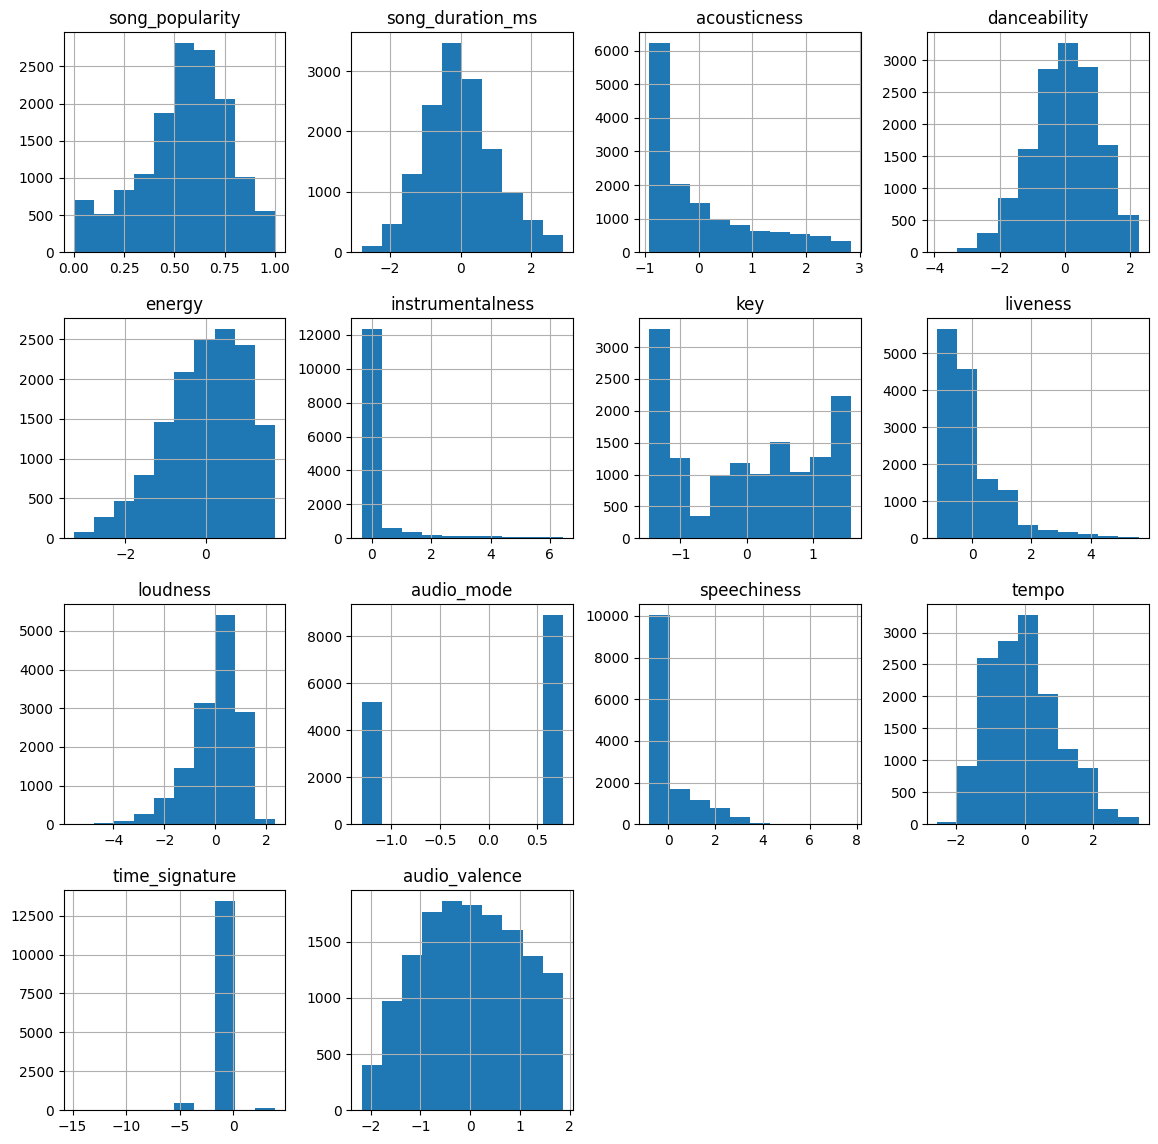

In [ ]:
data.info()
data.hist(figsize=(14,14))

## Dataset preparation
Next we will split dataset to train set, validation set and test set. First we randomly choose 30% as test set. Then we use $k$-fold validation on the remaining 70% to generate $k$ different train set and validation set pairs, where $k=5$.

In [ ]:
def test_split(data, test_size: float=0.3, seed=seed):
    '''
    Use function train_test_split() to split test set.
    '''
    # ========== YOUR CODE STARTS HERE ==========
    # X represents the independant feature data, and y represents the dependant feature data
    # use iloc to get dataset of everything but song popularity
    X = data.drop(['song_popularity'], axis = 1)
    # make y equal to the song popularity column
    y = data['song_popularity']
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
    # need to turn y_test into a dataframe for test loss to calculate properly
    y_test = y_test.to_frame()
    pass
    # ========== YOUR CODE ENDS HERE ============

    return (X_train_val.reset_index(drop=True),
            y_train_val.reset_index(drop=True),
            X_test.reset_index(drop=True),
            y_test.reset_index(drop=True))


def train_val_split(X_train_val, y_train_val, k=5, seed=seed):
    '''
    Use given index sets to generate k train and validation pairs. The return value should be
    a list whose components are tuples:
    [(X_train1, y_train1, X_val1, y_val1), ..., (X_traink, y_traink, X_valk, y_valk)]

    Here suppose data length is 10, the index sets could be like:
                    [[2,5], [1,6], [3,8], [9,4], [0,7]]

    '''
    index_shuffle = list(X_train_val.index)
    random.shuffle(index_shuffle)
    index_split_list = [[index_shuffle[i+j] for i in range(0, len(index_shuffle), 5)  if i+j<len(index_shuffle)] for j in range(5)]
    train_val_pairs = [(None, None, None, None) for _ in range(k)]
    # ========== YOUR CODE STARTS HERE ==========
    # X_train_val/y_train_val contains ALL of our training and validation data. We are going to split it according to
    # the indeces given from index_split_list
    y_train_val =y_train_val.to_frame()
    # first, iterate through index_split list
    bookmark = 0
    for p in range(len(index_split_list)):
      # we want to iterate through and assign val and train sets, where i'th index is validation set
      # we should also define X_train, y_train, X_val, y_val
      X_val= pd.DataFrame(columns = X_train_val.columns)
      X_train = pd.DataFrame(columns = X_train_val.columns)
      #set correct number of columns for our dataframes
      y_val = pd.DataFrame(columns = ['song_popularity'])
      y_train = pd.DataFrame(columns = ['song_popularity'])
      for r in range(len(index_split_list)):
        # load data in index_split_list[r] into training sets, unless r is equal to p
        single_index_list = index_split_list[r]
        if r == bookmark:
          #load data into validation sets
          #for n in single_index_list :
          # add data to val sets
          #print(X_train_val.iloc[[n]])
          X_val =X_val.append(X_train_val.loc[single_index_list,:], ignore_index=True)
          y_val =y_val.append(y_train_val.loc[single_index_list,:], ignore_index=True)
          #print(r)
          #print(X_val)
        else:
          #load data into training sets
          #for f in single_index_list :
          # add data to val sets
          X_train =X_train.append(X_train_val.loc[single_index_list,:],ignore_index=True)
          y_train =y_train.append(y_train_val.loc[single_index_list,:],ignore_index=True)
          #print(r)
        #print(r)
      #add our dataframes to train_val_pairs
      #print(X_train)
      train_val_pairs[p] = (X_train,y_train,X_val,y_val)
      bookmark+=1
      #print(p)
    pass
    # ========== YOUR CODE ENDS HERE ============
    return train_val_pairs

X_train_val, y_train_val, X_test, y_test = test_split(data)
train_val_pairs = train_val_split(X_train_val, y_train_val)

<ipython-input-22-f2acbdecd451>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_val =X_val.append(X_train_val.loc[single_index_list,:], ignore_index=True)
<ipython-input-22-f2acbdecd451>:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_val =y_val.append(y_train_val.loc[single_index_list,:], ignore_index=True)
<ipython-input-22-f2acbdecd451>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train =X_train.append(X_train_val.loc[single_index_list,:],ignore_index=True)
<ipython-input-22-f2acbdecd451>:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train =y_train.append(y_train_val.loc[single_index_list,:],ignore_index=True)
<i

In [ ]:
print(train_val_pairs)

[(      song_duration_ms  acousticness  danceability    energy  \
0            -2.115682     -0.773586     -0.523883  0.165571   
1            -0.493942     -0.916639     -0.188537  1.272300   
2            -0.923027     -0.141480      0.710191 -0.469773   
3             1.103917      1.423626     -0.698263 -1.386923   
4            -0.311054     -0.179376      0.643122 -0.787445   
...                ...           ...           ...       ...   
7915          2.223905      2.026173      0.106568 -0.244328   
7916          0.807910     -0.870221     -0.658021 -0.116235   
7917          0.111938     -0.016423      0.576053  0.862400   
7918         -0.049212      0.506542      0.119982  0.232180   
7919         -1.069459     -0.757669     -0.108054  1.226186   

      instrumentalness       key  liveness  loudness  audio_mode  speechiness  \
0            -0.351959  1.017061 -0.219684  0.638854    0.764945    -0.297341   
1            -0.351959 -1.191320 -0.761129  0.670992    0.764945   

In [ ]:
def MSE_loss(pred: np.ndarray, target: np.ndarray):
    # ========== YOUR CODE STARTS HERE ==========
    # create the MSE function for the np arrays
    n = len(pred)
    MSEarray = np.subtract(pred, target)
    MSEarray = np.square(MSEarray)
    return (1/(2*n))*np.sum(MSEarray)
    pass
    # ========== YOUR CODE ENDS HERE ============

def gradient(X: np.ndarray, y: np.ndarray, theta: np.ndarray):
    # ========== YOUR CODE STARTS HERE ==========
    gradient = (np.transpose(theta)@np.transpose(X)@X) - (np.transpose(y)@X)
    gradient= gradient/len(X)
    return gradient
    pass
    # ========== YOUR CODE ENDS HERE ============

# Specify epoch and learning rate
# ========== YOUR CODE STARTS HERE ==========
num_epochs = 4000
learning_rate = 0.001
# ========== YOUR CODE ENDS HERE ============
k = 5
train_loss_history = [[] for _ in range(k)]
val_loss_history = [[] for _ in range(k)]

theta_min = None
index_min = None
loss_min = None

for i in range(k):
    X_train, y_train, X_val, y_val = train_val_pairs[i]

    # Translate dataframe to numpy
    # ========== YOUR CODE STARTS HERE ==========
    X_train = X_train.to_numpy()
    y_train = y_train.to_numpy()
    X_val = X_val.to_numpy()
    y_val = y_val.to_numpy()
    #adding ones to X_train and X_val
    #print(y_train)
    colofones = np.ones((np.shape(X_train)[0],1))
    X_train = np.append(colofones,X_train,axis=1)
    colofones = np.ones((np.shape(X_val)[0],1))
    #X_train = np.prepend(X_train,np.ones((np.shape(X_train)[0],1)),axis=1)
    X_val = np.append(colofones,X_val,axis=1)
    pass
    # ========== YOUR CODE ENDS HERE ============

    # Initialize theta
    # ========== YOUR CODE STARTS HERE ==========
    # theta just needs to be the same length as # of features + 1 (for bias trick)
    theta = [[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]]
    pass
    # ========== YOUR CODE ENDS HERE ============

    for epoch in trange(num_epochs, desc="Epoch"):
        # Compute loss, and save to train_loss_history and val_loss_history
        # ========== YOUR CODE STARTS HERE ==========
        # Computing loss

        loss_train = MSE_loss(X_train@theta,y_train)
        #print(loss_train)
        #saving loss to train_loss_history
        train_loss_history[i].append(loss_train)
        #doing the same to validation set
        loss_val = MSE_loss(X_val@theta,y_val)
        #print(loss_val)
        val_loss_history[i].append(loss_val)
        pass
        # ========== YOUR CODE ENDS HERE ============

        # Update parameter
        # ========== YOUR CODE STARTS HERE ==========
        #update thetas using gradient function
        #print(gradient(X_train,y_train,theta).shape)
        theta = theta - learning_rate*np.transpose(gradient(X_train,y_train,theta))
        #print(theta)
        #print(theta.shape)
        pass
        # ========== YOUR CODE ENDS HERE ============


    # Inference on validation set, and find the best parameters. Save corresponding parameters and index in theta_min and  index_min
    # ========== YOUR CODE STARTS HERE ==========
    #go through and find smallest theta
    if loss_min == None :
      loss_min = val_loss_history[i][-1]
      theta_min = theta
      index_min = i
    else :
      if loss_min > val_loss_history[i][-1]:
        loss_min = val_loss_history[i][-1]
        theta_min = theta
        index_min = i
    pass
    # ========== YOUR CODE ENDS HERE ============

print(f"Final train loss for the best model: {train_loss_history[index_min][-1]}")
print(f"Final validation loss for the best model: {val_loss_history[index_min][-1]}")
print("Parameters for the best model: ")
print(theta_min)

plt.plot(np.arange(num_epochs), train_loss_history[index_min], label="Train loss")
plt.plot(np.arange(num_epochs), val_loss_history[index_min], label="Val loss")
plt.title("Train + validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


# Evaluate on test set
# ========== YOUR CODE STARTS HERE ==========
#prepend column of ones to x_test
colofones = np.ones((np.shape(X_test)[0],1))
X_test = np.append(colofones,X_test,axis=1)
test_loss = MSE_loss(X_test @ theta_min, y_test)
pass
# ========== YOUR CODE ENDS HERE ============
print(f"Test loss: {test_loss}")

Epoch:   0%|          | 0/4000 [00:00<?, ?it/s]

ValueError: ignored